<a href="https://colab.research.google.com/github/Tanveer132/ML-Practices-End-to-End/blob/main/Classification_SVM_oversampling_ParamTun.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Support Vector Machine 

It works on smaller datasets, but on complex ones, it can be much stronger and powerful in building machine learning models.

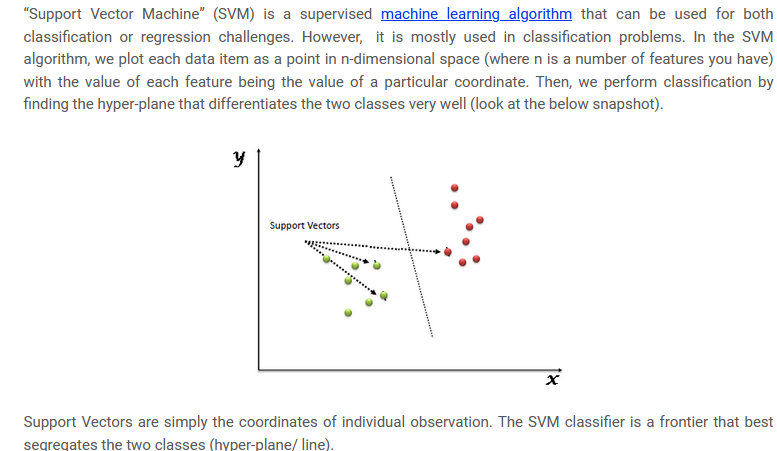


Support Vectors

    Support vectors are the data points, which are closest to the hyperplane. 
    These points will define the separating line better by calculating margins. 
    These points are more relevant to the construction of the classifier.

Hyperplane

    A hyperplane is a decision plane which separates between a set of 
    objects having different class memberships.


Margin

    A margin is a gap between the two lines on the closest class points. This is calculated as the perpendicular distance 
    from the line to support vectors or closest points. If the margin is larger in between the classes, 
    then it is considered a good margin, a smaller margin is a bad margin.

In [28]:
#Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold

from sklearn.svm import SVC

In [2]:
df = pd.read_csv('/content/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


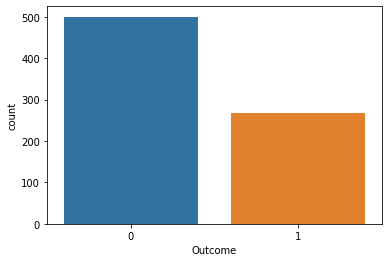

In [3]:
sns.countplot(data=df, x='Outcome')

Conclusion :

    unbalanced information amoung the classes can be observed.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
x=df.drop(columns="Outcome")
y=df["Outcome"]
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)

###Fitting model and Predicting classes

In [18]:
model = SVC()
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)

Accuracy : 0.7922077922077922
Report :
               precision    recall  f1-score   support

           0       0.81      0.92      0.86       107
           1       0.73      0.51      0.60        47

    accuracy                           0.79       154
   macro avg       0.77      0.71      0.73       154
weighted avg       0.78      0.79      0.78       154



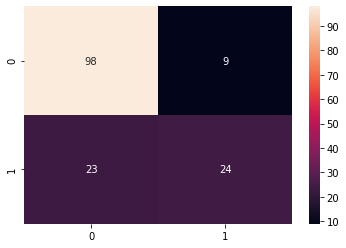

In [14]:
#Calulate accuracy, calssification report and confusion matrix

print("Accuracy :", accuracy_score(ytest,ypred))
print("Report :\n",classification_report(ytest,ypred))
cm=confusion_matrix(ytest,ypred)
sns.heatmap(data=cm,annot=True)

###Balancing data - Oversampling technique

In [19]:
#Select data for each label
yes=df[df['Outcome']==1].index
no=df[df['Outcome']==0].index

#We will increase "yes" data equal to "no"
random_index=np.array(np.random.choice(yes,len(no)))
new_index=np.concatenate([no,random_index])
data=df.iloc[new_index,:]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


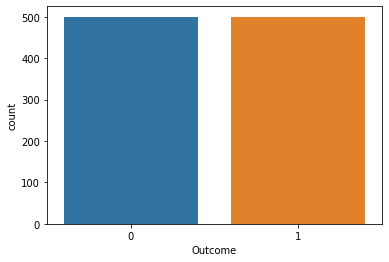

In [20]:
sns.countplot(data['Outcome'],data=data)

In [23]:
x=data.drop(columns='Outcome')
y=data['Outcome']

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)

In [24]:
# Fitting model
model.fit(xtrain,ytrain)

ypred=model.predict(xtest)

Accuracy : 0.745
Report :
               precision    recall  f1-score   support

           0       0.71      0.81      0.76        98
           1       0.79      0.69      0.73       102

    accuracy                           0.74       200
   macro avg       0.75      0.75      0.74       200
weighted avg       0.75      0.74      0.74       200



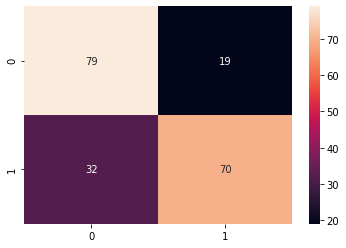

In [25]:
#Calulate accuracy, calssification report and confusion matrix

print("Accuracy :", accuracy_score(ytest,ypred))
print("Report :\n",classification_report(ytest,ypred))
cm=confusion_matrix(ytest,ypred)
sns.heatmap(data=cm,annot=True)

Conclusion :

    Overall accuracy decreased but accuracy for class 1 increased.

###Tunning Hyperparameters

In [29]:
# help(SVC)
#estimators
model=SVC()

#params
params={"C":[100,10,1,0.1,0.01],
        "kernel":['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],
        "gamma":['scale']}

#cross validator
kfold=RepeatedStratifiedKFold(n_splits=5, n_repeats=10,random_state=1)

In [32]:
# grid_cv=GridSearchCV(estimator=model,param_grid=params,cv=kfold,scoring='accuracy')
# result=grid_cv.fit(xtrain,ytrain)

In [ ]:
# print(result.best_score_)
# print(result.best_params_)

In [37]:
#model 
model = SVC(kernel='rbf',C=100,gamma='scale')
model.fit(xtrain,ytrain)

ypred=model.predict(xtest)

Accuracy : 0.785
Report :
               precision    recall  f1-score   support

           0       0.78      0.78      0.78        98
           1       0.79      0.79      0.79       102

    accuracy                           0.79       200
   macro avg       0.78      0.78      0.78       200
weighted avg       0.78      0.79      0.78       200



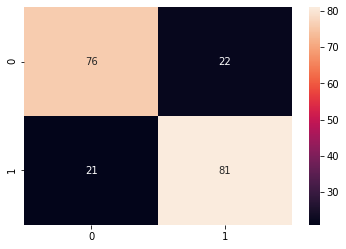

In [38]:
#Calulate accuracy, calssification report and confusion matrix

print("Accuracy :", accuracy_score(ytest,ypred))
print("Report :\n",classification_report(ytest,ypred))
cm=confusion_matrix(ytest,ypred)
sns.heatmap(data=cm,annot=True)